In [108]:
import pandas as pd
import missingno as msno
import numpy as np

In [109]:
df = pd.read_csv('alldata_clean.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [110]:
df.loc[(df.redcap_event_name == 'baseline_arm_1'),'redcap_event_name']='0bl'
df.loc[(df.redcap_event_name == '1_yr_follow_up_arm_1'),'redcap_event_name']='1yr'
df.loc[(df.redcap_event_name == '2_yr_follow_up_arm_1'),'redcap_event_name']='2yr'
df.loc[(df.redcap_event_name == '3_yr_follow_up_arm_1'),'redcap_event_name']='3yr'
df.loc[df['participant_id_side'].str.contains('L'), 'participant_id_side'] = 'L'
df.loc[df['participant_id_side'].str.contains('R'), 'participant_id_side'] = 'R'
df.head()
df.describe(include = 'all')

,participant_id_side,participant_id,redcap_event_name,helper column,mri_date,dob,age,gender,height_m,weight_kg,bmi,kl_score,kl_score_contra,shoamri_total,shoamri_car_score,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,shoamri_mis_score,mhi5_score,hoos_symptoms_score,hoos_adl_score,hoos_sports_score,hoos_qol_score,hoos_pain_score,char_rise,m_walk_test,stair_climbing,side_plank,st_hip_side,t1rho_mean_fem_whole_cartilage,t2_mean_fem_whole_cartilage,t1rho_mean_ace_whole_cartilage,t2_mean_ace_whole_cartilage,t1rho_mean_fem_2,t1rho_mean_fem_3,t1rho_mean_fem_4,t1rho_mean_fem_5,t1rho_mean_fem_6,t1rho_mean_fem_7,t2_mean_fem_2,t2_mean_fem_3,t2_mean_fem_4,t2_mean_fem_5,t2_mean_fem_6,t2_mean_fem_7,t1rho_mean_ace_2,t1rho_mean_ace_3,t1rho_mean_ace_4,t1rho_mean_ace_5,t1rho_mean_ace_6,t2_mean_ace_2,t2_mean_ace_3,t2_mean_ace_4,t2_mean_ace_5,t2_mean_ace_6,st_hip_flex_norm,st_hip_ext_norm,st_hip_abd_norm,st_hip_add_norm,dominant_leg,ipaq_ss_vdhrs_c,ipaq_vigorous_met,ipaq_ss_mdhrs_c,ipaq_moderate_met,ipaq_ss_wdhrs_c,ipaq_walking_met,ipaq_categorical_score
count,726,726,726,726.000000,484,199,491.000000,423.000000,458.000000,459.000000,458.000000,194.000000,193.000000,401.000000,403.000000,403.000000,403.000000,401.000000,402.000000,252.000000,501.000000,501.000000,501.000000,501.000000,501.000000,437.000000,436.000000,432.000000,434.000000,723.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,473.000000,475.000000,475.000000,475.000000,475.000000,474.000000,475.000000,475.000000,475.000000,475.000000,475.000000,473.000000,475.000000,475.000000,475.000000,475.000000,419.000000,419.000000,413.000000,406.000000,61.000000,176.000000,252.000000,195.000000,252.000000,247.000000,252.000000,249.000000
unique,2,97,4,NaN,219,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,L,P001,0bl,NaN,5/17/18,10/3/90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,367,8,194,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.914601,NaN,NaN,53.637475,1.612293,2.048127,67.762789,24.032118,1.298969,1.305699,11.384040,3.089330,0.545906,0.573201,6.825436,0.335821,79.095238,89.610778,93.589481,88.585329,84.780439,91.122754,21.668192,19.956287,10.309792,71.669101,1.495159,36.736114,34.211751,37.351274,33.425465,40.492084,41.745783,36.258579,36.470793,33.505243,32.315060,36.496265,39.057162,34.180783,34.388631,30.725783,29.380819,34.605818,39.644346,36.440490,38.068214,33.267061,30.928608,34.993026,32.079042,34.937631,30.415687,0.380764,1.054368,0.257942,0.453374,1.934426,0.965909,1382.857143,0.984615,800.634921,1.121457,1613.726190,1.574297
std,NaN,NaN,NaN,2.323109,NaN,NaN,15.390659,0.487804,8.052880,13.772230,3.664398,1.004291,1.002507,7.987624,3.111839,1.639000,1.506694,4.335257,0.602704,14.224399,13.457273,12.043770,17.557700,20.134590,13.753160,7.982333,3.440494,3.141275,48.141947,0.500323,3.981269,5.286033,4.110639,4.800367,6.622925,5.165927,5.039051,5.144453,5.057133,6.710688,7.106766,6.023112,5.547985,6.043276,6.837736,7.632087,6.015145,5.615405,4.981883,5.727710,6.947499,6.193522,5.804112,5.680697,6.040983,7.759366,0.946276,5.643780,0.702928,0.130918,0.249590,0.925189,1823.199717,0.986909,1045.839007,0.971873,1159.914526,0.495445
min,NaN,NaN,NaN,0.000000,NaN,NaN,23.000000,1.000000,1.470000,43.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [111]:
#change date columns to datetime
#df.mri_date = pd.to_datetime(df.mri_date, format='%m/%d/%y')
#df.dob = pd.to_datetime(df.dob, format='%m/%d/%y')

In [112]:
#df['dob_cleaned'] = df.groupby('participant_id')['dob'].ffill().bfill() #fill in dob based by participant 
#df['dob_cleaned'] = df['dob_cleaned'] - pd.offsets.DateOffset(years=100)
#df['age_cleaned_days'] = df.mri_date - df.dob_cleaned #calculate age based on mri_date
#df['age_cleaned_years'] = df.age_cleaned_days/np.timedelta64(1,'Y')
#df['age_cleaned_days']

In [113]:
df.describe(include = 'all')
df.head(n=15)
#list(df.columns)

,participant_id_side,participant_id,redcap_event_name,helper column,mri_date,dob,age,gender,height_m,weight_kg,bmi,kl_score,kl_score_contra,shoamri_total,shoamri_car_score,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,shoamri_mis_score,mhi5_score,hoos_symptoms_score,hoos_adl_score,hoos_sports_score,hoos_qol_score,hoos_pain_score,char_rise,m_walk_test,stair_climbing,side_plank,st_hip_side,t1rho_mean_fem_whole_cartilage,t2_mean_fem_whole_cartilage,t1rho_mean_ace_whole_cartilage,t2_mean_ace_whole_cartilage,t1rho_mean_fem_2,t1rho_mean_fem_3,t1rho_mean_fem_4,t1rho_mean_fem_5,t1rho_mean_fem_6,t1rho_mean_fem_7,t2_mean_fem_2,t2_mean_fem_3,t2_mean_fem_4,t2_mean_fem_5,t2_mean_fem_6,t2_mean_fem_7,t1rho_mean_ace_2,t1rho_mean_ace_3,t1rho_mean_ace_4,t1rho_mean_ace_5,t1rho_mean_ace_6,t2_mean_ace_2,t2_mean_ace_3,t2_mean_ace_4,t2_mean_ace_5,t2_mean_ace_6,st_hip_flex_norm,st_hip_ext_norm,st_hip_abd_norm,st_hip_add_norm,dominant_leg,ipaq_ss_vdhrs_c,ipaq_vigorous_met,ipaq_ss_mdhrs_c,ipaq_moderate_met,ipaq_ss_wdhrs_c,ipaq_walking_met,ipaq_categorical_score
0,L,P001,0bl,0,10/27/16,10/15/51,65.0,1.0,1.80,97.30,30.03,2.0,3.0,15.0,7.0,1.0,1.0,5.0,1.0,80.0,100.0,100.00,100.00,100.00,100.0,12.0,20.89,10.77,14.27,1.0,39.493545,36.250000,45.899765,31.185062,37.171642,44.196532,37.442348,40.568306,37.929268,36.808081,36.007463,40.698758,37.521459,36.840659,30.441463,37.909091,50.798319,53.857605,45.309417,41.805344,38.597826,39.825000,31.045317,29.757919,30.534884,30.734043,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN,0.0,0.0,148.5,1.0
1,L,P001,1yr,1,11/6/17,NaN,66.0,1.0,1.78,93.70,29.57,NaN,NaN,11.0,3.0,1.0,1.0,5.0,1.0,76.0,70.0,82.35,81.25,68.75,92.5,15.0,20.70,10.63,NaN,1.0,40.077684,34.878938,45.215222,39.098701,42.401408,43.391304,35.740042,45.003643,35.521951,38.333333,39.850000,42.921283,33.153040,33.140000,32.275184,28.818182,49.035714,50.614035,43.564516,45.221374,29.595745,39.347826,37.831429,36.360248,44.493069,27.934066,0.26,0.41,0.24,0.51,NaN,NaN,0.0,NaN,0.0,1.0,1386.0,1.0
2,L,P001,2yr,0,12/11/18,NaN,67.0,1.0,1.78,94.90,29.95,NaN,NaN,18.0,8.0,2.0,2.0,5.0,1.0,76.0,90.0,83.82,50.00,75.00,92.5,17.0,19.10,9.80,5.00,1.0,40.776593,43.611907,42.816199,39.948726,38.971831,48.462209,42.033755,38.889091,37.704878,33.979381,42.328571,50.500000,45.236674,47.418819,33.990244,34.489796,43.089431,44.082857,41.069444,43.269517,43.797872,43.122951,41.910145,37.670000,41.169173,33.521277,0.29,0.36,NaN,0.36,NaN,1.0,480.0,1.0,480.0,2.0,2772.0,2.0
3,L,P001,3yr,0,11/6/19,NaN,68.0,NaN,1.79,97.40,30.40,NaN,NaN,16.0,7.0,1.0,2.0,5.0,1.0,56.0,75.0,64.71,56.25,75.00,77.5,16.0,20.71,10.45,11.54,1.0,38.498367,40.279898,45.451602,42.702547,40.514286,47.200000,37.768898,37.474954,33.692683,35.131313,39.727273,44.549254,36.694624,41.590994,40.213235,36.731183,40.201613,43.869707,44.276458,48.108481,48.623529,39.429752,39.794702,40.464516,46.289941,48.901235,0.27,0.60,0.16,0.47,NaN,NaN,0.0,NaN,0.0,2.0,2772.0,1.0
4,R,P001,0bl,0,10/27/16,10/15/51,65.0,1.0,1.80,97.30,30.03,3.0,2.0,16.0,3.0,0.0,1.0,12.0,0.0,NaN,100.0,100.00,100.00,100.00,100.0,12.0,20.89,10.77,8.99,2.0,37.203218,31.179208,40.687780,35.657792,38.609929,45.260116,34.735294,35.735883,36.031707,32.101010,34.780142,38.620290,31.699580,28.598182,27.619512,26.757576,46.525000,50.877778,39.918977,35.337945,36.141304,35.741071,40.038168,33.424837,34.630832,39.919540,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R,P001,1yr,1,11/6/17,NaN,66.0,1.0,1.78,93.70,29.57,NaN,NaN,11.0,3.0,0.0,0.0,8.0,0.0,NaN,80.0,83.82,68.75,62.50,90.0,15.0,20.70,10.63,NaN,2.0,37.879020,32.693179,43.403567,31.288018,38.439716,43.358382,36.827731,37.049091,36.612195,34.292929,32.964539,37.522796,35.890830,31.582117,28.541463,25.373737,46.023810,53.544262,42.268132,38.417440,41.297872,30.926230,33.029126,28.575163,30.931734,41.494505,0.18,0.47,0.14,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R,P001,2yr,0,12/11/18,NaN,67.0,1.0,1.78,94.90,29.95,NaN,NaN,15.0,6.0,1.0,0.0,8.0,0.0,NaN,90.0,85.29,68.75,81.25,92.5,17.0,19.10,9.80,11.00,2.0,37.646445,36.157157,40.7662

In [114]:
df['idx'] = df['redcap_event_name'] + '_' + df['participant_id_side'] 

In [115]:
df_wide = pd.pivot_table(df, index='participant_id', columns = 'idx')
df_wide = df_wide.sort_index(axis=1, level=1) #sort by columns
df_wide.columns = [f'{x}_{y}' for x,y in df_wide.columns]

In [116]:
df_wide.head()
list(df_wide.columns)


['age_0bl_L',
 'bmi_0bl_L',
 'char_rise_0bl_L',
 'dominant_leg_0bl_L',
 'gender_0bl_L',
 'height_m_0bl_L',
 'helper column_0bl_L',
 'hoos_adl_score_0bl_L',
 'hoos_pain_score_0bl_L',
 'hoos_qol_score_0bl_L',
 'hoos_sports_score_0bl_L',
 'hoos_symptoms_score_0bl_L',
 'ipaq_categorical_score_0bl_L',
 'ipaq_moderate_met_0bl_L',
 'ipaq_ss_mdhrs_c_0bl_L',
 'ipaq_ss_vdhrs_c_0bl_L',
 'ipaq_ss_wdhrs_c_0bl_L',
 'ipaq_vigorous_met_0bl_L',
 'ipaq_walking_met_0bl_L',
 'kl_score_0bl_L',
 'kl_score_contra_0bl_L',
 'm_walk_test_0bl_L',
 'mhi5_score_0bl_L',
 'shoamri_bme_score_0bl_L',
 'shoamri_car_score_0bl_L',
 'shoamri_lab_score_0bl_L',
 'shoamri_mis_score_0bl_L',
 'shoamri_sc_score_0bl_L',
 'shoamri_total_0bl_L',
 'side_plank_0bl_L',
 'st_hip_abd_norm_0bl_L',
 'st_hip_add_norm_0bl_L',
 'st_hip_ext_norm_0bl_L',
 'st_hip_flex_norm_0bl_L',
 'st_hip_side_0bl_L',
 'stair_climbing_0bl_L',
 't1rho_mean_ace_2_0bl_L',
 't1rho_mean_ace_3_0bl_L',
 't1rho_mean_ace_4_0bl_L',
 't1rho_mean_ace_5_0bl_L',
 't1rho_m

In [117]:

#variables that only are kept for first year and left side
df_wide_2 = df_wide.drop(['height_m_0bl_R','height_m_1yr_R', 'height_m_1yr_L','height_m_2yr_R', 'height_m_2yr_L', 'height_m_3yr_R', 'height_m_3yr_L',
                         'gender_0bl_R', 'gender_1yr_L','gender_1yr_R','gender_2yr_L','gender_2yr_R','gender_3yr_L','gender_3yr_R',
                         'dominant_leg_0bl_R'], axis=1)
df_wide_2.rename(columns={'height_m_0bl_L': 'height', 'gender_0bl_L': 'gender', 'dominant_leg_0bl_L': 'dominant_leg'}, inplace=True)



In [123]:
#variables that only are kept for left side
df_wide_3 = df_wide_2.drop(['age_0bl_R', 'bmi_0bl_R','weight_kg_0bl_R','age_1yr_R','bmi_1yr_R', 'weight_kg_1yr_R', 'age_2yr_R','bmi_2yr_R','weight_kg_2yr_R',
              'age_3yr_R','bmi_3yr_R','weight_kg_3yr_R',
             'char_rise_0bl_R',  'char_rise_1yr_R',  'char_rise_2yr_R',  'char_rise_3yr_R',
             'm_walk_test_0bl_R','m_walk_test_1yr_R','m_walk_test_2yr_R','m_walk_test_3yr_R',
             'stair_climbing_0bl_R','stair_climbing_1yr_R','stair_climbing_2yr_R','stair_climbing_3yr_R',
            'kl_score_contra_0bl_L','kl_score_contra_0bl_R',], axis =1)
df_wide_3.rename(columns={'age_0bl_L': 'age_0bl', 'age_1yr_L': 'age_1yr', 'age_2yr_L': 'age_2yr', 'age_3yr_L': 'age_3yr',
                         'bmi_0bl_L': 'bmi_0bl', 'bmi_1yr_L': 'bmi_1yr', 'bmi_2yr_L': 'bmi_2yr', 'bmi_3yr_L': 'bmi_3yr',
                         'weight_kg_0bl_L': 'weight_kg_0bl', 'weight_kg_1yr_L': 'weight_kg_1yr', 'weight_kg_2yr_L': 'weight_kg_2yr', 'weight_kg_3yr_L': 'weight_kg_3yr',
                         'char_rise_0bl_L': 'char_rise_0bl', 'char_rise_1yr_L': 'char_rise_1yr', 'char_rise_2yr_L': 'char_rise_2yr', 'char_rise_3yr_L': 'char_rise_3yr',
                         'm_walk_test_0bl_L': 'm_walk_test_0bl', 'm_walk_test_1yr_L': 'm_walk_test_1yr', 'm_walk_test_2yr_L': 'm_walk_test_2yr', 'm_walk_test_3yr_L': 'm_walk_test_3yr',
                         'stair_climbing_0bl_L': 'stair_climbing_0bl', 'stair_climbing_1yr_L': 'stair_climbing_1yr', 'stair_climbing_2yr_L': 'stair_climbing_2yr', 'stair_climbing_3yr_L': 'stair_climbing_3yr',
                         'mhi5_score_0bl_L': 'mhi5_score_0bl', 'mhi5_score_1yr_L': 'mhi5_score_1yr', 'mhi5_score_2yr_L': 'mhi5_score_2yr', 'mhi5_score_3yr_L': 'mhi5_score_3yr',}, inplace=True)

In [119]:
list(df_wide_3.columns)
df_wide_3 = df_wide_3.sort_index(axis=1, level=1) #sort by columns

In [120]:
list(df_wide_3.columns)

['age_0bl',
 'age_1yr',
 'age_2yr',
 'age_3yr',
 'bmi_0bl',
 'bmi_1yr',
 'bmi_2yr',
 'bmi_3yr',
 'char_rise_0bl',
 'char_rise_1yr',
 'char_rise_2yr',
 'char_rise_3yr',
 'dominant_leg',
 'gender',
 'height',
 'helper column_0bl_L',
 'helper column_0bl_R',
 'helper column_1yr_L',
 'helper column_1yr_R',
 'helper column_2yr_L',
 'helper column_2yr_R',
 'helper column_3yr_L',
 'helper column_3yr_R',
 'hoos_adl_score_0bl_L',
 'hoos_adl_score_0bl_R',
 'hoos_adl_score_1yr_L',
 'hoos_adl_score_1yr_R',
 'hoos_adl_score_2yr_L',
 'hoos_adl_score_2yr_R',
 'hoos_adl_score_3yr_L',
 'hoos_adl_score_3yr_R',
 'hoos_pain_score_0bl_L',
 'hoos_pain_score_0bl_R',
 'hoos_pain_score_1yr_L',
 'hoos_pain_score_1yr_R',
 'hoos_pain_score_2yr_L',
 'hoos_pain_score_2yr_R',
 'hoos_pain_score_3yr_L',
 'hoos_pain_score_3yr_R',
 'hoos_qol_score_0bl_L',
 'hoos_qol_score_0bl_R',
 'hoos_qol_score_1yr_L',
 'hoos_qol_score_1yr_R',
 'hoos_qol_score_2yr_L',
 'hoos_qol_score_2yr_R',
 'hoos_qol_score_3yr_L',
 'hoos_qol_score_3

<AxesSubplot:>

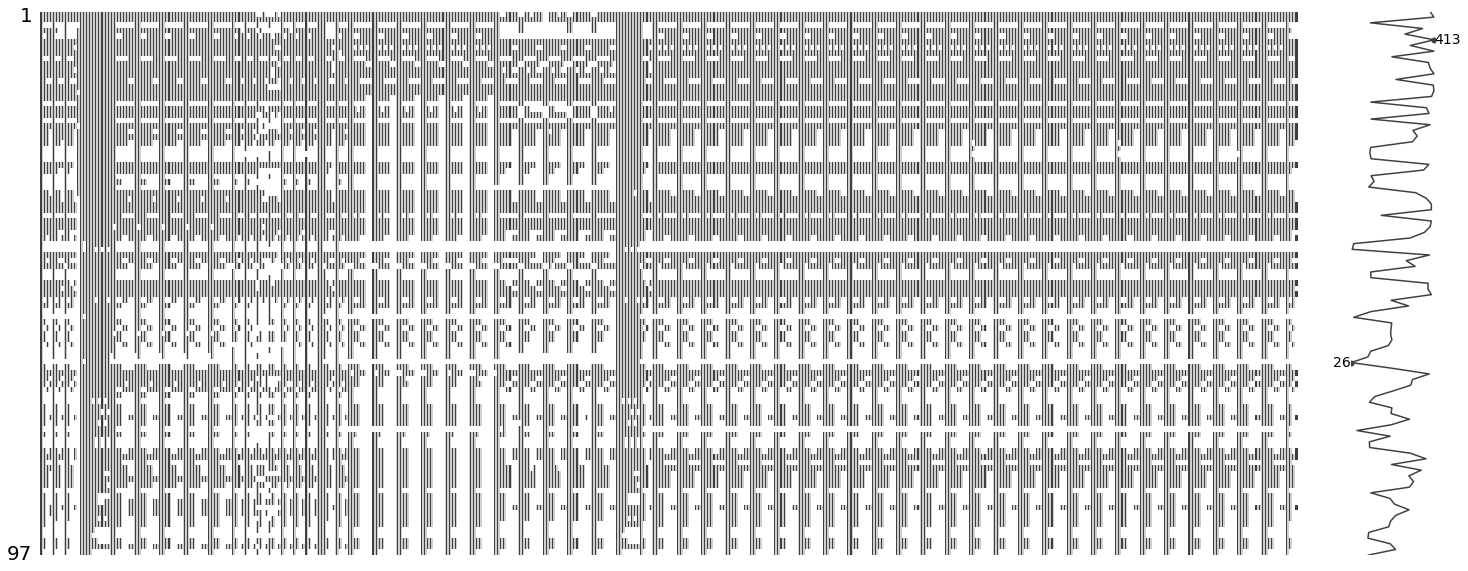

In [17]:
msno.matrix(df_wide_3)

<AxesSubplot:>

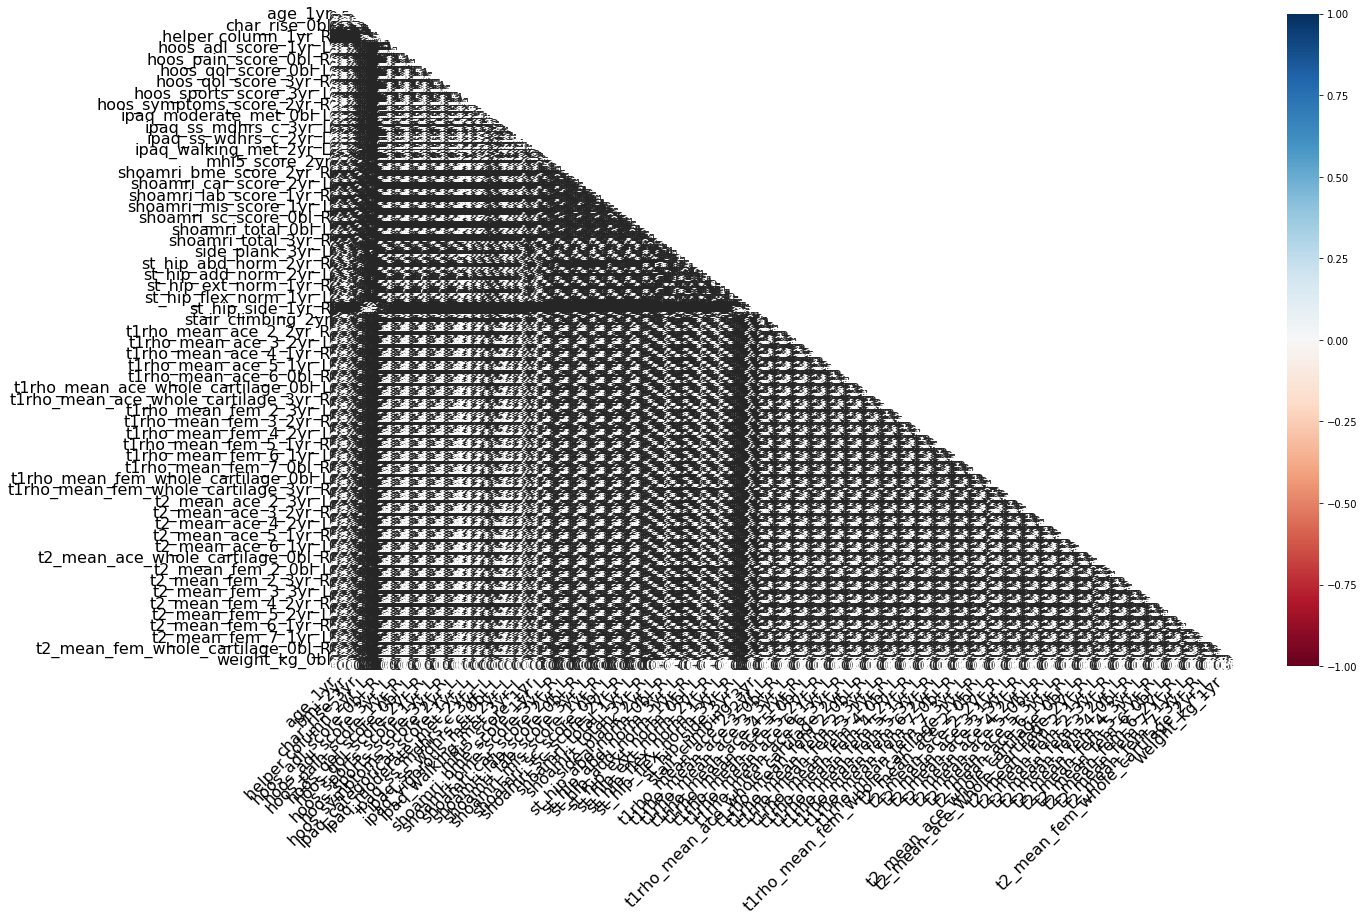

In [18]:
msno.heatmap(df_wide_3)

<AxesSubplot:>

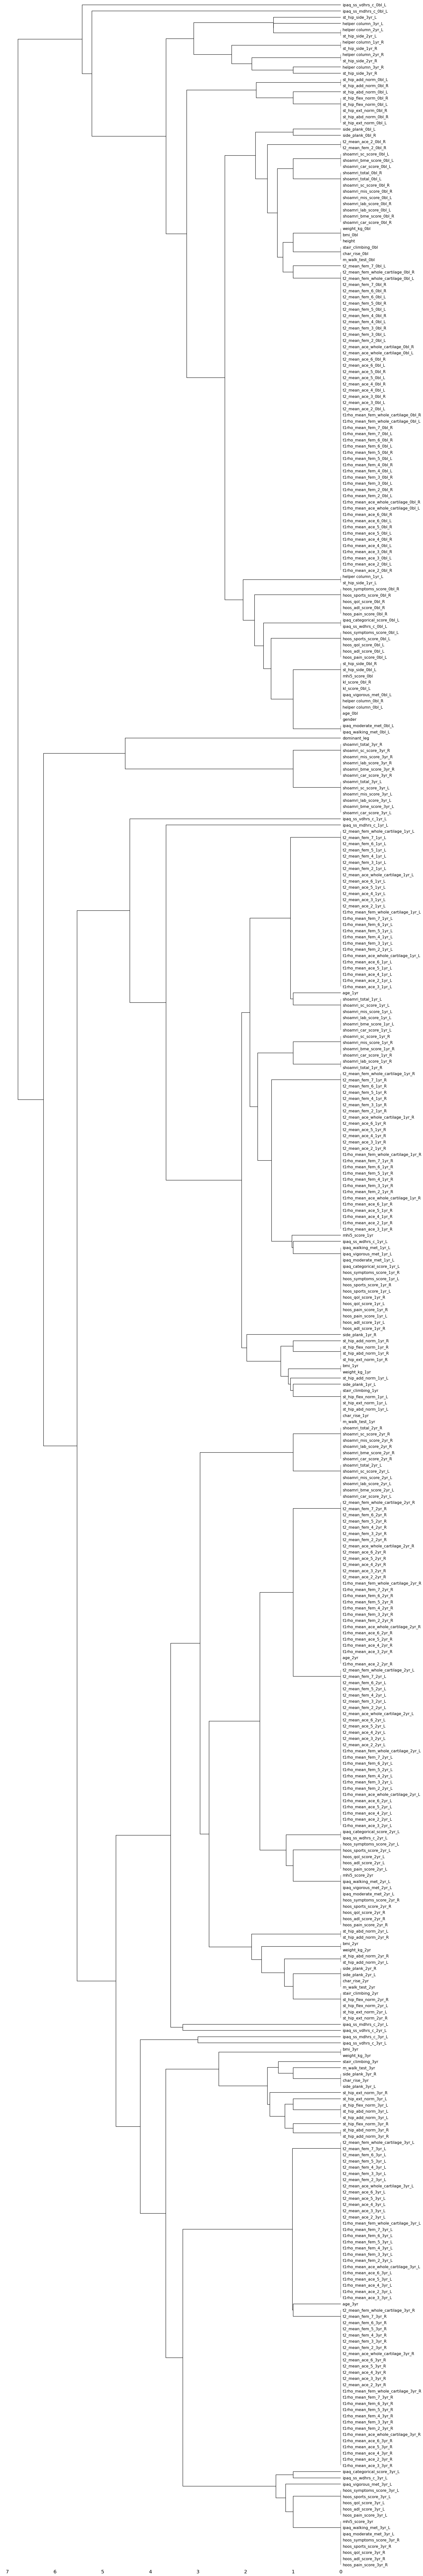

In [19]:
msno.dendrogram(df_wide_3)

In [121]:
df_wide_3.isna().sum()

age_0bl                                  0
age_1yr                                 34
age_2yr                                 52
age_3yr                                 57
bmi_0bl                                  4
bmi_1yr                                 35
bmi_2yr                                 56
bmi_3yr                                 64
char_rise_0bl                            5
char_rise_1yr                           36
char_rise_2yr                           58
char_rise_3yr                           69
dominant_leg                            67
gender                                   0
height                                   4
helper column_0bl_L                      0
helper column_0bl_R                      0
helper column_1yr_L                      3
helper column_1yr_R                      7
helper column_2yr_L                      9
helper column_2yr_R                     10
helper column_3yr_L                      9
helper column_3yr_R                     12
hoos_adl_sc

In [125]:
df_wide_bl_2yr = df_wide_3.dropna(subset=['age_2yr']) 
df_wide_bl_2yr = df_wide_bl_2yr.sort_index(axis=1, level=1) #sort by columns
df_wide_bl_2yr.isna().sum()

age_0bl                                  0
age_1yr                                  5
age_2yr                                  0
age_3yr                                 13
bmi_0bl                                  0
bmi_1yr                                  5
bmi_2yr                                  4
bmi_3yr                                 18
char_rise_0bl                            1
char_rise_1yr                            6
char_rise_2yr                            6
char_rise_3yr                           23
dominant_leg                            25
gender                                   0
height                                   0
helper column_0bl_L                      0
helper column_0bl_R                      0
helper column_1yr_L                      0
helper column_1yr_R                      1
helper column_2yr_L                      0
helper column_2yr_R                      0
helper column_3yr_L                      1
helper column_3yr_R                      3
hoos_adl_sc

In [126]:
df_wide_bl_2yr = df_wide_bl_2yr.drop(df_wide_bl_2yr.filter(regex='1yr').columns, axis=1)
df_wide_bl_2yr = df_wide_bl_2yr.drop(df_wide_bl_2yr.filter(regex='3yr').columns, axis=1)

In [127]:
df_wide_bl_2yr.isna().sum()

age_0bl                                  0
age_2yr                                  0
bmi_0bl                                  0
bmi_2yr                                  4
char_rise_0bl                            1
char_rise_2yr                            6
dominant_leg                            25
gender                                   0
height                                   0
helper column_0bl_L                      0
helper column_0bl_R                      0
helper column_2yr_L                      0
helper column_2yr_R                      0
hoos_adl_score_0bl_L                     0
hoos_adl_score_0bl_R                     1
hoos_adl_score_2yr_L                     1
hoos_adl_score_2yr_R                     1
hoos_pain_score_0bl_L                    0
hoos_pain_score_0bl_R                    1
hoos_pain_score_2yr_L                    1
hoos_pain_score_2yr_R                    1
hoos_qol_score_0bl_L                     0
hoos_qol_score_0bl_R                     1
hoos_qol_sc